In [1]:
import os
import time
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# Load the CIFAR10 dataset

from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

xTrain = xTrain[:50000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:50000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

# Show dimension for each variable
print ('Train image shape:    {0}'.format(xTrain.shape))
print ('Train label shape:    {0}'.format(yTrain.shape))

print ('Test image shape:     {0}'.format(xTest.shape))
print ('Test label shape:     {0}'.format(yTest.shape))


Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step
Train image shape:    (50000, 32, 32, 3)
Train label shape:    (50000,)
Test image shape:     (10000, 32, 32, 3)
Test label shape:     (10000,)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


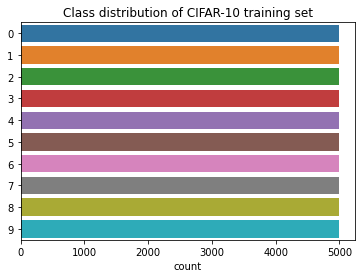

In [2]:
import seaborn as sns

ax = sns.countplot(y=yTrain)
ax.set_title("Class distribution of CIFAR-10 training set")
plt.show()

In [0]:
print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.

xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

#Normalize 
xTrain=((xTrain/255)*2)-1 
print(xTrain.shape)
print(xTrain[0])

(50000, 32, 32, 3)
(50000,)
(50000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]
(50000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
 -0.43529412]


In [0]:
train_x,train_y = xTrain[0:49000],yTrain[0:49000]
val_x, val_y = xTrain[49000:],yTrain[49000:]

print("No. of training samples = ",train_x.shape[0])
print("No. of validation set samples = ",val_x.shape[0])

No. of training samples =  49000
No. of validation set samples =  1000


In [0]:
#Building the actual classifier:
#inputs will be of shape N X F where N = number of examples and F = number of features for each image.
#labels will be of size N,1. This consists of labels for all N labels from 10 classes

class kNearestNeighbour(object):
    def __init__(self):
        pass
    
    def train(self,X,Y):
        #Knn will remember all of its training data
        self.Xtr = X
        self.Ytr = Y
        
    def predict(self,X,k):
        #to get no. of samples in train set 
        test_samples = X.shape[0]
        
        Ypred = np.zeros(test_samples,dtype=self.Ytr.dtype)
        
        #Calculating the l1 distance between current samples of test and train set
        for i in range(test_samples):
            print("Test example = ",i,end="\r")
            
            #label_count is array of zeros used to store the count for each class while comparing neighbours
            label_count = np.zeros(10,dtype=self.Ytr.dtype)    
            
            dist = np.sum(np.abs(X[i,:] - self.Xtr),axis=1)   #take the absolute sum horizontally across columns
            
            #idx will contain k smallest indices at the start of the list
            #this is called partial sorting for more information look: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html
            #min_ind will help us to slice through k indices which have minimum distance
            idx = np.argpartition(dist,k)
            min_ind = idx[:k]
            
            #This for loop iterates over min_ind and find the label present in train-set_Y for x
            #and increase the count at that particular index whenever any label is repeated.
            #Max value at any index is returned using np.argmax() and stored at ith index of Ypred i.e. predicted values
            for x in min_ind:
                label_count[int(self.Ytr[x])] +=1
            Ypred[i] = np.argmax(label_count)
    
    
        return Ypred

In [0]:

#lets use validation set for prediction and to calculate accuracy
#hyper-parameter k = 3, similarity measure = L1

knn = kNearestNeighbour()
knn.train(train_x,train_y)
val_y_pred = knn.predict(val_x,3)

#Accuracy for validation set
print('Val accuracy = ',np.mean(val_y_pred==val_y))

Val accuracy =  0.362


In [0]:

#hyper-parameter k = 5, similarity measure = L1

val_y_pred = knn.predict(val_x,5)

#Accuracy for validation set
print('Val accuracy = ',np.mean(val_y_pred==val_y))

Val accuracy =  0.347


In [0]:
#hyper-parameter k = 7, similarity measure = L1

val_y_pred = knn.predict(val_x,7)

#Accuracy for validation set
print('Val accuracy = ',np.mean(val_y_pred==val_y))

Val accuracy =  0.336


In [0]:

#hyper-parameter k = 9, similarity measure = L1

val_y_pred = knn.predict(val_x,9)

#Accuracy for validation set
print('Val accuracy = ',np.mean(val_y_pred==val_y))

Val accuracy =  0.339


In [0]:
#hyper-parameter k = 3, similarity measure = L1

test_y_pred = knn.predict(xTest,3)

#Accuracy for validation set
print('Test set accuracy = ',np.mean(test_y_pred==yTest))

Test set accuracy =  0.0998


In [0]:
#hyper-parameter k =5, similarity measure = L1
knn = kNearestNeighbour()
knn.train(train_x,train_y)
test_y_pred = knn.predict(xTest,5)

#Accuracy for validation set
print('Test set accuracy = ',np.mean(test_y_pred==yTest))

Test set accuracy =  0.1002


In [0]:
#hyper-parameter k = 7, similarity measure = L1

test_y_pred = knn.predict(xTest,7)

#Accuracy for validation set
print('Test set accuracy = ',np.mean(test_y_pred==yTest))

Test set accuracy =  0.1003
